In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold

In [2]:
mssql_df = pd.read_csv(r'D:\Kuliah\ProyekAkhir\New Data\resample\MSSQL_resample_4000.csv')
mssql_df

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.021072,-0.013958,-0.002917,-0.004205,-0.219050,-0.001653,-0.221938,-0.221586,-0.221759,-0.008236,...,0.325330,-0.001168,-0.000797,-0.001254,-0.000998,-0.012431,-0.00156,-0.012326,-0.012412,-1
1,0.021072,-0.013958,-0.002917,-0.004205,1.015610,-0.001653,1.079147,1.079875,1.079932,-0.008236,...,0.325328,-0.001168,-0.000797,-0.001254,-0.000998,-0.012431,-0.00156,-0.012326,-0.012412,-1
2,0.021072,-0.013958,-0.002917,-0.004205,-0.550300,-0.001653,-0.571010,-0.570759,-0.570994,-0.008236,...,0.325328,-0.001168,-0.000797,-0.001254,-0.000998,-0.012431,-0.00156,-0.012326,-0.012412,-1
3,0.021072,-0.013955,-0.002917,-0.004205,3.893615,-0.001653,4.111989,4.113596,4.114187,-0.008236,...,0.325328,-0.001168,-0.000797,-0.001254,-0.000998,-0.012431,-0.00156,-0.012326,-0.012412,-1
4,0.021072,-0.013958,-0.002917,-0.004205,-0.468563,-0.001653,-0.484875,-0.484600,-0.484819,-0.008236,...,0.325328,-0.001168,-0.000797,-0.001254,-0.000998,-0.012431,-0.00156,-0.012326,-0.012412,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5556,0.021072,-0.013958,-0.002917,-0.004205,-0.425544,-0.001653,-0.439541,-0.439253,-0.439464,-0.008236,...,0.325328,-0.001168,-0.000797,-0.001254,-0.000998,-0.012431,-0.00156,-0.012326,-0.012412,-1
5557,0.021072,-0.013958,-0.002917,-0.004205,-0.408336,-0.001653,-0.421408,-0.421114,-0.421322,-0.008236,...,0.325328,-0.001168,-0.000797,-0.001254,-0.000998,-0.012431,-0.00156,-0.012326,-0.012412,-1
5558,0.021072,-0.013958,-0.002917,-0.004205,-0.507281,-0.001653,-0.525676,-0.525412,-0.525638,-0.008236,...,0.325328,-0.001168,-0.000797,-0.001254,-0.000998,-0.012431,-0.00156,-0.012326,-0.012412,-1
5559,0.021072,-0.013958,-0.002917,-0.004205,-0.072784,-0.001653,-0.067803,-0.067406,-0.067552,-0.008236,...,0.325328,-0.001168,-0.000797,-0.001254,-0.000998,-0.012431,-0.00156,-0.012326,-0.012412,-1


In [3]:
benign_test_df = pd.read_csv(r'D:\Kuliah\ProyekAkhir\New Data\resample\Benign_resample_4000.csv')

In [4]:
# novelty detection
df = pd.concat([benign_test_df, mssql_df], ignore_index=True)

In [5]:
clean_dataset = df.drop([" Protocol", ' Label'], axis=1)

In [6]:
tres = 0.1

lowvariancefilter = VarianceThreshold(threshold=tres)
lowvariancefilter.fit_transform(clean_dataset)

filtered_cols = clean_dataset.drop(
    columns=clean_dataset.columns[lowvariancefilter.get_support()].array
).columns.array

lowvariance_dataset = clean_dataset.drop(columns=filtered_cols)
lowvariance_dataset

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,-0.343690,-0.086569,0.096351,0.142000,0.002723,0.706619,1.982467,1.798333,-0.034669,0.643201,...,-0.226895,-0.059807,-0.095769,-0.109896,-0.112787,-0.020891,-0.339324,-0.282883,-0.341153,-0.315336
1,5.598377,2.253048,4.681794,3.829148,0.125465,3.569438,-0.039001,2.481753,5.125594,0.931779,...,6.200510,-0.059807,1.103561,0.162506,0.515708,1.673959,6.184780,12.942534,8.511326,2.479016
2,-0.344938,-0.176134,0.096351,-0.053129,-0.005474,-0.046063,-0.039001,-0.049093,-0.034669,0.003313,...,-0.472948,-0.059807,-0.095769,-0.109896,-0.112787,-0.020891,-0.339324,-0.282883,-0.341153,-0.315336
3,-0.344948,-0.086569,-0.154149,-0.037724,-0.006439,-0.046063,-0.039001,-0.049093,-0.034669,-0.071968,...,-0.226895,-0.059807,-0.095769,-0.109896,-0.112787,-0.020891,-0.339324,-0.282883,-0.341153,-0.315336
4,-0.343689,-0.086569,0.096351,0.147135,0.002883,0.728125,2.040223,1.851116,-0.034669,0.655748,...,-0.226895,-0.059807,-0.095769,-0.109896,-0.112787,-0.020891,-0.339324,-0.282883,-0.341153,-0.315336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,-0.013958,-0.002917,-0.004205,-0.425544,-0.001653,-0.439541,-0.439253,-0.439464,-0.008236,-0.007716,...,-0.027228,0.325328,-0.001168,-0.000797,-0.001254,-0.000998,-0.012431,-0.001560,-0.012326,-0.012412
9560,-0.013958,-0.002917,-0.004205,-0.408336,-0.001653,-0.421408,-0.421114,-0.421322,-0.008236,-0.007716,...,-0.027228,0.325328,-0.001168,-0.000797,-0.001254,-0.000998,-0.012431,-0.001560,-0.012326,-0.012412
9561,-0.013958,-0.002917,-0.004205,-0.507281,-0.001653,-0.525676,-0.525412,-0.525638,-0.008236,-0.007716,...,-0.027228,0.325328,-0.001168,-0.000797,-0.001254,-0.000998,-0.012431,-0.001560,-0.012326,-0.012412
9562,-0.013958,-0.002917,-0.004205,-0.072784,-0.001653,-0.067803,-0.067406,-0.067552,-0.008236,-0.007716,...,-0.027228,0.325328,-0.001168,-0.000797,-0.001254,-0.000998,-0.012431,-0.001560,-0.012326,-0.012412


In [8]:
lowvariance_dataset["Label"] = df[" Label"].astype('category').cat.codes
lowvariance_dataset["Label"]

0       1
1       1
2       1
3       1
4       1
       ..
9559    0
9560    0
9561    0
9562    0
9563    0
Name: Label, Length: 9564, dtype: int8

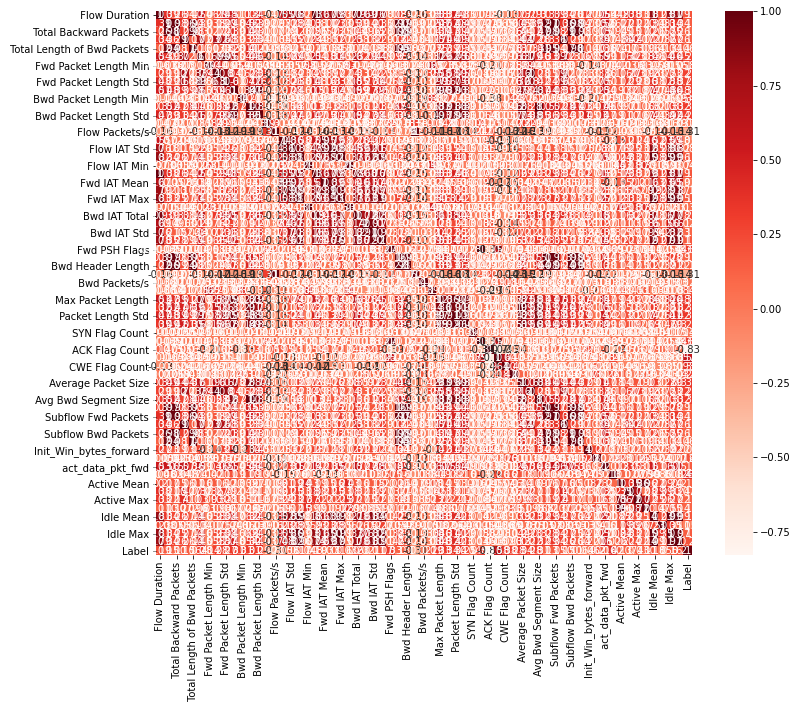

In [9]:
plt.figure(figsize=(12,10))
cor = lowvariance_dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [10]:
cor_target = abs(cor["Label"])
cor_target

 Flow Duration                  0.193692
 Total Fwd Packets              0.147063
 Total Backward Packets         0.113315
Total Length of Fwd Packets     0.146662
 Total Length of Bwd Packets    0.063603
                                  ...   
Idle Mean                       0.182519
 Idle Std                       0.054528
 Idle Max                       0.162544
 Idle Min                       0.196831
Label                           1.000000
Name: Label, Length: 65, dtype: float64

In [15]:
relevant_features = cor_target[cor_target>0.2]
relevant_features

 Fwd Packet Length Max     0.276953
 Fwd Packet Length Mean    0.282506
 Fwd Packet Length Std     0.271649
Bwd Packet Length Max      0.313028
 Bwd Packet Length Min     0.307399
 Bwd Packet Length Mean    0.312616
 Bwd Packet Length Std     0.293217
 Flow Packets/s            0.308721
Bwd IAT Total              0.227578
Fwd PSH Flags              0.325041
Fwd Packets/s              0.309988
 Max Packet Length         0.327667
 Packet Length Mean        0.335257
 Packet Length Std         0.339154
 Packet Length Variance    0.252781
 RST Flag Count            0.325041
 ACK Flag Count            0.827241
 URG Flag Count            0.583501
 CWE Flag Count            0.376123
 Down/Up Ratio             0.281048
 Average Packet Size       0.343881
 Avg Fwd Segment Size      0.282506
 Avg Bwd Segment Size      0.312616
 min_seg_size_forward      0.421844
Label                      1.000000
Name: Label, dtype: float64